In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install --upgrade scikit-learn==1.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

start_time = time.time()

# 1. Load URL
fname = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2/Test Gambling.txt'
with open(fname) as inputFile:
    kontent = inputFile.readlines()
kontent = ["https://" + x.strip() for x in kontent]

for i, urls in enumerate(kontent):
    print(i, urls)

# 2. Scraping URL
url_situs = []
judul_situs = []
konten_situs = []
tag_situs = []
successful_urls = []
failed_urls = []

n = len(kontent)

# 3. Function to scrape a single URL
def scrape_url(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}
    for attempt in range(2):  # Retry up to 2 times
        try:
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()  # Ensure the request was successful
            return response.content
            return None

        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} for {url} failed with error: {e}. Retrying...")
            time.sleep(2)  # Wait for 2 seconds before retrying
    return None

for i in range(n):
    try:
        content = scrape_url(kontent[i])
        if content is None:
            print(f'Skip url: {kontent[i]} after multiple retries')
            failed_urls.append(kontent[i])
            continue

        soup = BeautifulSoup(content, "html.parser")

        # Remove all JavaScript and stylesheet code
        for script in soup(["script", "style"]):
            script.extract()

        # Get the title
        judul = soup.find('title').get_text() if soup.find('title') else 'No Title'
        judul_situs.append(judul)
        url_situs.append(kontent[i])

        # Get the content
        konten_temp = [par.text.strip() for par in soup.findAll('p')]
        konten = ' '.join(konten_temp)
        konten_situs.append(konten)

        # Get the tags
        seen = set()
        hasil = []
        for a in soup.findAll('a', {'rel': 'tag'}):
            taglines = a.get_text().strip()
            href = a.get('href', '').strip()
            if taglines and href:
                combined = f'{taglines} ({href})'
                if combined not in seen:
                    hasil.append(combined)
                    seen.add(combined)
        tagline = '\n'.join(hasil)
        tag_situs.append(tagline)

        # Track successful URL
        successful_urls.append(kontent[i])

    except Exception as e:
        print(f'Skip url: {kontent[i]} karena error: {e}')
        failed_urls.append(kontent[i])
        continue

# Output untuk Verifikasi
print(url_situs)
print(judul_situs)
print(konten_situs)
print(tag_situs)

# 3. Menyimpan Data ke CSV
data = {
    'url': url_situs,
    'title': judul_situs,
    'content': konten_situs,
    'category': tag_situs
}
df = pd.DataFrame(data)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Waktu Eksekusi: {elapsed_time:.2f} seconds')
from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

0 https://altomonlinecasino.dk
['https://altomonlinecasino.dk']
['Nyheder og strategier til casinospil']
['Evaluering af "danske casinoer" fra en spillers perspektiv\n\nDanske casinoer er en essentiel del af spilindustrien i Danmark og tilbyder en bred vifte af casinospil og underholdning til danskere. Som spiller er det vigtigt at evaluere danske casinoer for at sikre, at de opfylder dine forventninger og krav.\n\n- Spiludvalg: Et vigtigt aspekt ved danske... Evaluering af "danske casinoer" fra en spillers perspektiv\n\nDanske casinoer er en essentiel del af spilindustrien i Danmark og tilbyder en bred vifte ... Peter Mortensen 18 januar 2024 I denne artikel vil vi evaluere Online Casino Danmark fra en spillers perspektiv. Vi vil dykke ned i, hvad der gør dette online casino til en favorit blandt danske spillere, og vi vil også diskutere nogle af de vigtige elementer, som enhver person, der er interesseret i casino spil, skal være opmærksom på.\n\nPræsentation af Online Casino Danmark

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import os
import re

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Mengubah semua teks menjadi huruf kecil
def regeks(teks):
    if isinstance(teks, str):
        teks = teks.lower()
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af "danske casinoer" fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte af casinospil og underholdning til danskere. som spiller er det vigtigt at evaluere danske casinoer for at sikre, at de opfylder dine forventninger og krav.\n\n- spiludvalg: et vigtigt aspekt ved danske... evaluering af "danske casinoer" fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte ... peter mortensen 18 januar 2024 i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv. vi vil dykke ned i, hvad der gør dette online casino til en favorit blandt danske spillere, og vi vil også diskutere nogle af de vigtige elementer, som enhver person, der er interesseret i casino spil, skal være opmærksom på.\n\npræsentation af online casino danmark\n\non... i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv. vi vil dykke 

In [ ]:
# Menghilangkan Tag HTML
def regeks(teks):
    if isinstance(teks, str):
      teks = teks.lower()
      teks = re.sub(r'<[^>]*>', '', teks)
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af "danske casinoer" fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte af casinospil og underholdning til danskere. som spiller er det vigtigt at evaluere danske casinoer for at sikre, at de opfylder dine forventninger og krav.\n\n- spiludvalg: et vigtigt aspekt ved danske... evaluering af "danske casinoer" fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte ... peter mortensen 18 januar 2024 i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv. vi vil dykke ned i, hvad der gør dette online casino til en favorit blandt danske spillere, og vi vil også diskutere nogle af de vigtige elementer, som enhver person, der er interesseret i casino spil, skal være opmærksom på.\n\npræsentation af online casino danmark\n\non... i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv. vi vil dykke 

In [ ]:
# URL Remover
def regeks(teks):
    if isinstance(teks, str):
      teks = teks.lower()
      teks = re.sub(r'<[^>]*>', '', teks)
      teks = re.sub(r'http?://\S+ ?', '', teks)
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af "danske casinoer" fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte af casinospil og underholdning til danskere. som spiller er det vigtigt at evaluere danske casinoer for at sikre, at de opfylder dine forventninger og krav.\n\n- spiludvalg: et vigtigt aspekt ved danske... evaluering af "danske casinoer" fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte ... peter mortensen 18 januar 2024 i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv. vi vil dykke ned i, hvad der gør dette online casino til en favorit blandt danske spillere, og vi vil også diskutere nogle af de vigtige elementer, som enhver person, der er interesseret i casino spil, skal være opmærksom på.\n\npræsentation af online casino danmark\n\non... i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv. vi vil dykke 

In [ ]:
# Symbol Remover
def regeks(teks):
    if isinstance(teks, str):
      teks = teks.lower()
      teks = re.sub(r'<[^>]*>', '', teks)
      teks = re.sub(r'http?://\S+ ?', '', teks)
      teks = re.sub(r'[^\w\s]', '', teks)
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af danske casinoer fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte af casinospil og underholdning til danskere som spiller er det vigtigt at evaluere danske casinoer for at sikre at de opfylder dine forventninger og krav\n\n spiludvalg et vigtigt aspekt ved danske evaluering af danske casinoer fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte  peter mortensen 18 januar 2024 i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv vi vil dykke ned i hvad der gør dette online casino til en favorit blandt danske spillere og vi vil også diskutere nogle af de vigtige elementer som enhver person der er interesseret i casino spil skal være opmærksom på\n\npræsentation af online casino danmark\n\non i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv vi vil dykke ned i hvad der gør dette o

In [ ]:
# Number Remover
def regeks(teks):
    if isinstance(teks, str):
      teks = teks.lower()
      teks = re.sub(r'<[^>]*>', '', teks)
      teks = re.sub(r'http?://\S+ ?', '', teks)
      teks = re.sub(r'[^\w\s]', '', teks)
      teks = re.sub(r'[0-9]+', ' ', teks)
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af danske casinoer fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte af casinospil og underholdning til danskere som spiller er det vigtigt at evaluere danske casinoer for at sikre at de opfylder dine forventninger og krav\n\n spiludvalg et vigtigt aspekt ved danske evaluering af danske casinoer fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte  peter mortensen   januar   i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv vi vil dykke ned i hvad der gør dette online casino til en favorit blandt danske spillere og vi vil også diskutere nogle af de vigtige elementer som enhver person der er interesseret i casino spil skal være opmærksom på\n\npræsentation af online casino danmark\n\non i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv vi vil dykke ned i hvad der gør dette onlin

In [ ]:
def regeks(teks):
    if isinstance(teks, str):
      teks = teks.lower()
      teks = re.sub(r'<[^>]*>', '', teks)
      teks = re.sub(r'http?://\S+ ?', '', teks)
      teks = re.sub(r'[^\w\s]', '', teks)
      teks = re.sub(r'[0-9]+', ' ', teks)
      teks = re.sub(r'[^\x00-\x7f]', '', teks)
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af danske casinoer fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte af casinospil og underholdning til danskere som spiller er det vigtigt at evaluere danske casinoer for at sikre at de opfylder dine forventninger og krav\n\n spiludvalg et vigtigt aspekt ved danske evaluering af danske casinoer fra en spillers perspektiv\n\ndanske casinoer er en essentiel del af spilindustrien i danmark og tilbyder en bred vifte  peter mortensen   januar   i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv vi vil dykke ned i hvad der gr dette online casino til en favorit blandt danske spillere og vi vil ogs diskutere nogle af de vigtige elementer som enhver person der er interesseret i casino spil skal vre opmrksom p\n\nprsentation af online casino danmark\n\non i denne artikel vil vi evaluere online casino danmark fra en spillers perspektiv vi vil dykke ned i hvad der gr dette online casin

In [ ]:
def regeks(teks):
    if isinstance(teks, str):
      teks = teks.lower()
      teks = re.sub(r'<[^>]*>', '', teks)
      teks = re.sub(r'http?://\S+ ?', '', teks)
      teks = re.sub(r'[^\w\s]', '', teks)
      teks = re.sub(r'[0-9]+', ' ', teks)
      teks = re.sub(r'[^\x00-\x7f]', '', teks)
      stop_words = stopwords.words('french', 'english')
      teks = ' '.join([word for word in teks.split() if word not in stop_words])
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af danske casinoer fra spillers perspektiv danske casinoer er essentiel del af spilindustrien i danmark og tilbyder bred vifte af casinospil og underholdning til danskere som spiller er det vigtigt at evaluere danske casinoer for at sikre at opfylder dine forventninger og krav spiludvalg vigtigt aspekt ved danske evaluering af danske casinoer fra spillers perspektiv danske casinoer er essentiel del af spilindustrien i danmark og tilbyder bred vifte peter mortensen januar i denne artikel vil vi evaluere online casino danmark fra spillers perspektiv vi vil dykke ned i hvad der gr dette online casino til favorit blandt danske spillere og vi vil ogs diskutere nogle af vigtige elementer som enhver person der er interesseret i casino spil skal vre opmrksom p prsentation af online casino danmark i denne artikel vil vi evaluere online casino danmark fra spillers perspektiv vi vil dykke ned i hvad der gr dette online casino til favorit peter mortensen januar evaluering af casino da

In [ ]:
def regeks(teks):
    if isinstance(teks, str):
      teks = teks.lower()
      teks = re.sub(r'<[^>]*>', '', teks)
      teks = re.sub(r'http?://\S+ ?', '', teks)
      teks = re.sub(r'[^\w\s]', '', teks)
      teks = re.sub(r'[0-9]+', ' ', teks)
      teks = re.sub(r'[^\x00-\x7f]', '', teks)
      stop_words = stopwords.words('french', 'english')
      teks = ' '.join([word for word in teks.split() if word not in stop_words])
      lemmatizer = WordNetLemmatizer()
      teks = ' '.join([lemmatizer.lemmatize(word) for word in teks.split()])
    return teks

# Menerapkan preprocessing ke konten_situs
konten_situs_preprocessed = [regeks(teks) for teks in konten_situs]

# Output untuk verifikasi
print(konten_situs_preprocessed)

from IPython.display import display, HTML

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

['evaluering af danske casinoer fra spiller perspektiv danske casinoer er essentiel del af spilindustrien i danmark og tilbyder bred vifte af casinospil og underholdning til danskere som spiller er det vigtigt at evaluere danske casinoer for at sikre at opfylder dine forventninger og krav spiludvalg vigtigt aspekt ved danske evaluering af danske casinoer fra spiller perspektiv danske casinoer er essentiel del af spilindustrien i danmark og tilbyder bred vifte peter mortensen januar i denne artikel vil vi evaluere online casino danmark fra spiller perspektiv vi vil dykke ned i hvad der gr dette online casino til favorit blandt danske spillere og vi vil ogs diskutere nogle af vigtige elementer som enhver person der er interesseret i casino spil skal vre opmrksom p prsentation af online casino danmark i denne artikel vil vi evaluere online casino danmark fra spiller perspektiv vi vil dykke ned i hvad der gr dette online casino til favorit peter mortensen januar evaluering af casino danmar

In [ ]:
# 2.1 Preprocessing test Gambling
import pandas as pd
import os
import re

def regeks(teks):
    if isinstance(teks, str):
        teks = teks.lower()
        teks = re.sub(r'<[^>]*>', '', teks)
        teks = re.sub(r'http?://\S+ ?', '', teks)
        teks = re.sub(r'[^\w\s]', '', teks)
        teks = re.sub(r'[0-9]+', ' ', teks)
        teks = re.sub(r'[^\x00-\x7f]', '', teks)
        stop_words = stopwords.words('english') + \
                    stopwords.words('french') + \
                    stopwords.words('russian') + \
                    stopwords.words('indonesian')
        teks = ' '.join([word for word in teks.split() if word not in stop_words])
        lemmatizer = WordNetLemmatizer()
        teks = ' '.join([lemmatizer.lemmatize(word) for word in teks.split()])
        return teks
    return teks

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2/Test_G.csv', lineterminator='\n', encoding='utf-8')
df['contents'] = df['contents'].apply(regeks)
print(df['contents'])

# Save DataFrame to a CSV file
output_folder = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2'  # Specify the directory where you want to save the CSV
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = os.path.join(output_folder, 'Test_G_PP.csv')
df.to_csv(output_file, index=False)

print(f'Data has been saved to {output_file}')


0    evaluation danish casino player perspective da...
Name: contents, dtype: object
Data has been saved to /content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2/Test_G_PP.csv


In [ ]:
# 4. Feature Extraction
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import os

# Path ke file CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2/Test_G_PP.csv'
df = pd.read_csv(file_path)

# Membuat objek TfidfVectorizer dengan parameter tertentu
tfidf = TfidfVectorizer(
    sublinear_tf=True,   # Menggunakan sublinear tf scaling
    min_df=1,            # Meminimalkan frekuensi dokumen untuk setiap fitur
    norm='l2',           # Normalisasi L2 pada vektor
    encoding='latin-1',  # Encoding teks
    ngram_range=(1, 2),  # Menggunakan unigram dan bigram
)

# Mengisi nilai kosong pada kolom 'contents' dengan string kosong ' '
Ex = df['contents'].fillna(' ')

# Menyesuaikan dan mengubah teks menjadi fitur TF-IDF
features = tfidf.fit_transform(Ex).toarray()

# Menyiapkan label dari kolom 'category'
labels = df['category']

# Gabungkan fitur dan label ke dalam DataFrame
df_features = pd.DataFrame(features)
df_features['label'] = labels.values

# Path directory untuk menyimpan file
save_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2'

# Pastikan directory sudah ada, jika belum maka dibuat
os.makedirs(save_path, exist_ok=True)

# Menyimpan fitur dan label ke dalam file CSV
csv_path = os.path.join(save_path, 'Test_G_TFIDF.csv')
df_features.to_csv(csv_path, index=False)
print(f'Fitur dan label disimpan dalam format CSV di: {csv_path}')

Fitur dan label disimpan dalam format CSV di: /content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2/Test_G_TFIDF.csv


In [6]:
# prompt: tampilkan nama fitur dan skor fitu Test_G_TFIDF.csv. tampilkan dalam bentuk tabel

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import os


# Path ke file CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Gambling/Versi 2/Test_G_TFIDF.csv'
df = pd.read_csv(file_path)

# Mendapatkan nama fitur dari objek TfidfVectorizer (diasumsikan Anda telah menyimpannya)
feature_names = tfidf.get_feature_names_out()

# Membuat DataFrame baru dengan nama fitur dan skor fitur
df_feature_scores = pd.DataFrame({
    'Feature Name': feature_names,
    'Feature Score': features.sum(axis=0)  # Menjumlahkan skor fitur di semua dokumen
})

# Mengurutkan DataFrame berdasarkan skor fitur dalam urutan menurun
df_feature_scores = df_feature_scores.sort_values('Feature Score', ascending=False)

# Menampilkan DataFrame dalam bentuk tabel
display(df_feature_scores)


NotFittedError: Vocabulary not fitted or provided

<ipython-input-22-20afdcbd6e2d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


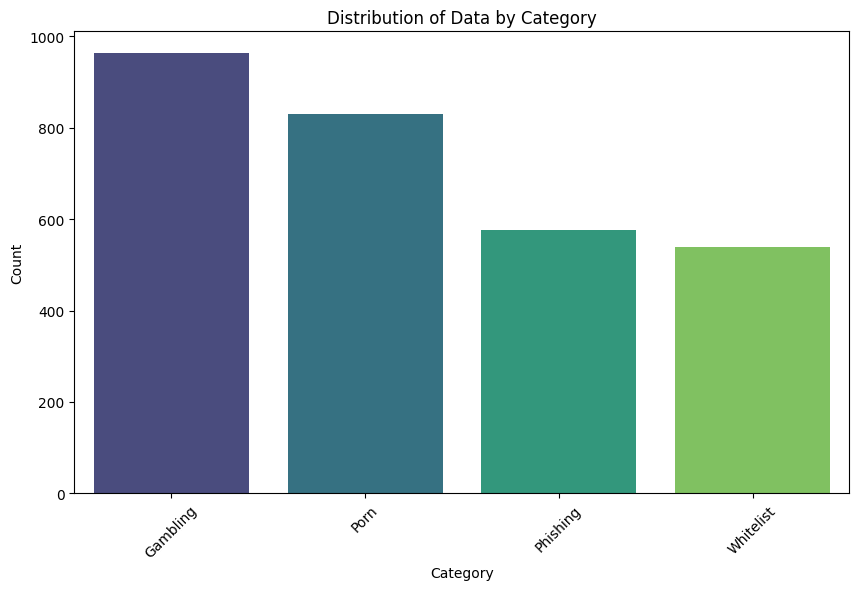

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/Dataset_Labelsv2.csv'
data = pd.read_csv(file_path)

# Count the number of instances in each category
category_counts = data['category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Data by Category')
plt.xticks(rotation=45)
plt.show()

**Average Accuracy for each model:
GaussianNB: 68.40%
KNeighborsClassifier: 30.02%
MultinomialNB: 70.59%
OneVsRestClassifier: 81.07%
SVC: 82.24**

Accuracy for MultinomialNB: 70.59%


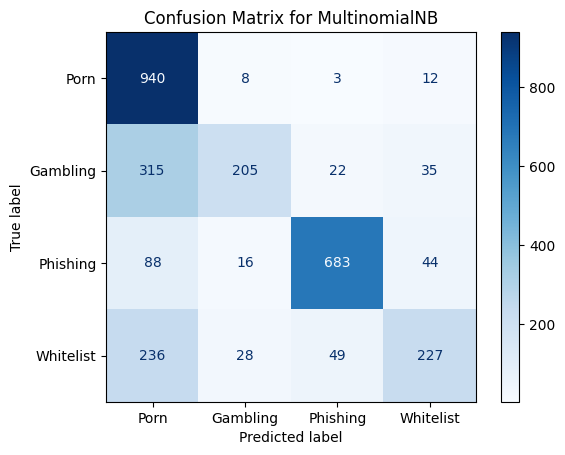

Accuracy for GaussianNB: 68.40%


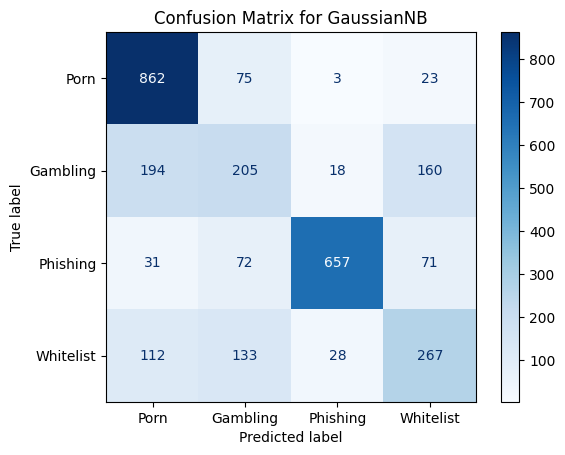

Accuracy for KNeighborsClassifier: 30.02%


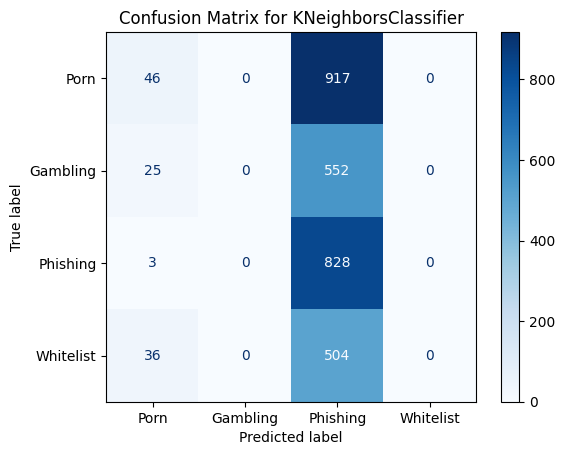

Accuracy for SVC: 82.24%


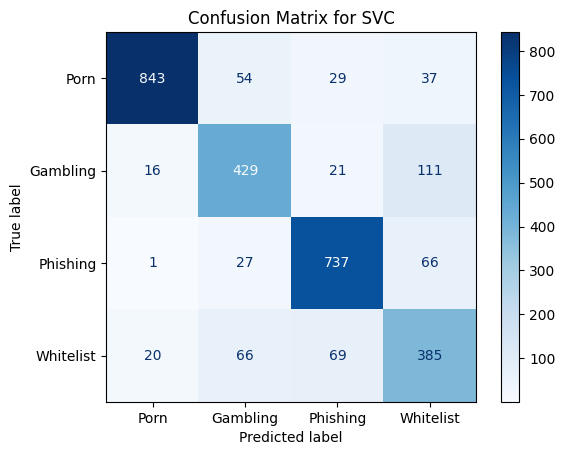

Accuracy for OneVsRestClassifier: 81.07%


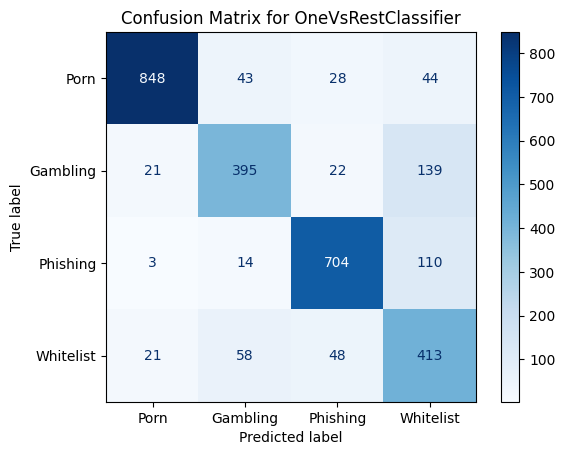

In [ ]:
# Confusion Matrix sesuai hasil akurasi training data
import pandas as pd
import joblib
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Load dataset from .pkl file
pkl_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/TFIDF/Data_TFIDF.pkl'
tfidf, features, labels = joblib.load(pkl_path)

# Define models
models = [
    MultinomialNB(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=25),
    SVC(kernel='linear', C=1),
    OneVsRestClassifier(LinearSVC(class_weight="balanced"))
]

# Define category labels
category_labels = ['Porn', 'Gambling', 'Phishing', 'Whitelist']

# Cross-validation setup
CV = 5

# Generate confusion matrix and accuracy for each model
for model in models:
    model_name = model.__class__.__name__
    y_pred = cross_val_predict(model, features, labels, cv=CV)

    # Calculate confusion matrix
    cm = confusion_matrix(labels, y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(labels, y_pred)

    # Display accuracy
    print(f"Accuracy for {model_name}: {accuracy:.2%}")

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

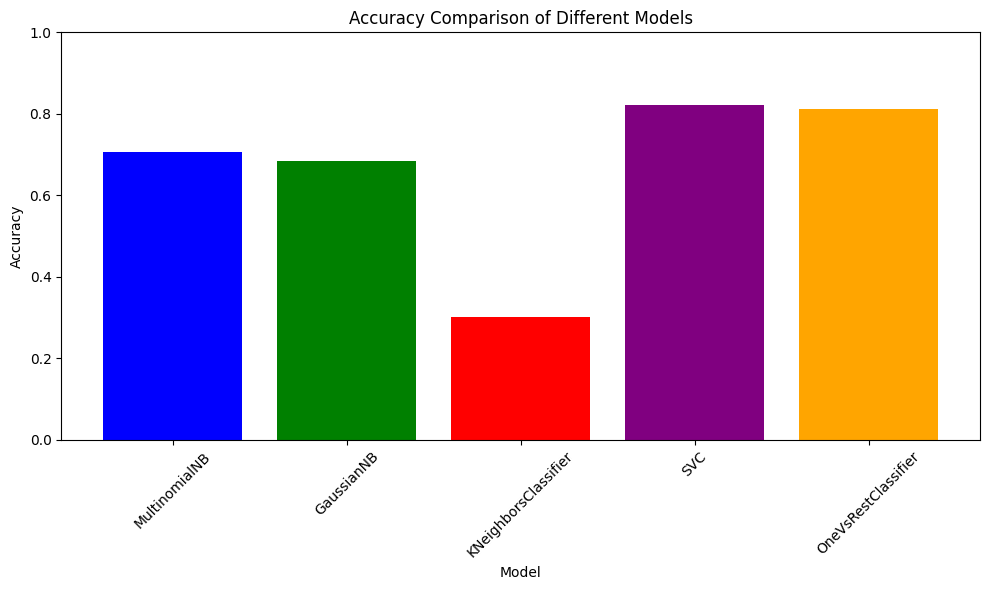

In [ ]:
# prompt: buatkan bar chart hasil masing-masing hasil model, berikan code lengkap, kolom kategori tidak dimasukkan

import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
# Load dataset from .pkl file
pkl_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/TFIDF/Data_TFIDF.pkl'
tfidf, features, labels = joblib.load(pkl_path)

# Define models
models = [
    MultinomialNB(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=25),
    SVC(kernel='linear', C=1),
    OneVsRestClassifier(LinearSVC(class_weight="balanced"))
]

# List to store accuracies
accuracies = []

# Cross-validation setup
CV = 5

# Calculate accuracy for each model
for model in models:
    model_name = model.__class__.__name__
    y_pred = cross_val_predict(model, features, labels, cv=CV)
    accuracy = accuracy_score(labels, y_pred)
    accuracies.append(accuracy)

# Model names for the bar chart
model_names = [
    'MultinomialNB',
    'GaussianNB',
    'KNeighborsClassifier',
    'SVC',
    'OneVsRestClassifier'
]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1 for accuracy
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


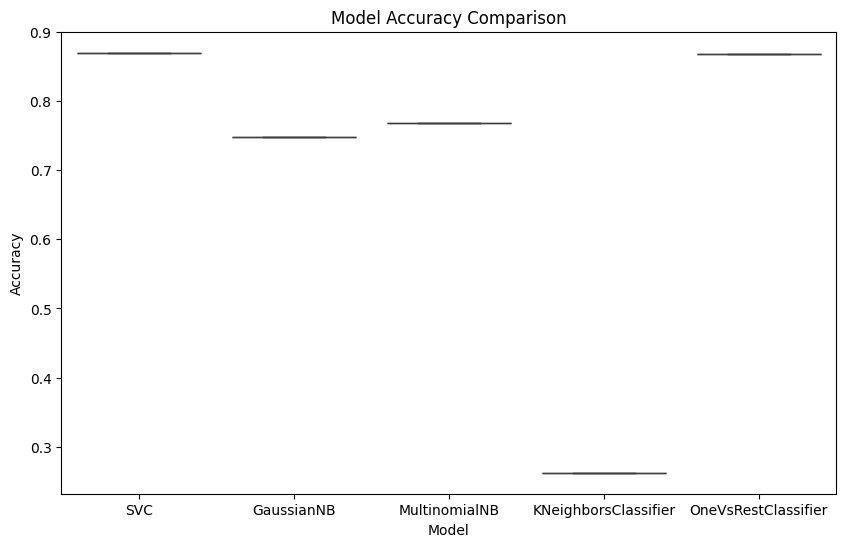

In [ ]:
# prompt: buatkan box plot hasil masing-masing hasil model, berikan code lengkap, kolom kategori tidak dimasukkan

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
# Load the TF-IDF data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/TFIDF/Dataset_TFIDF.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the label
labels = data['label']
features = data.drop(columns=['label'])

# Drop rows with 'Unknown' labels
data = data[~data['label'].isna()]  # Remove rows with NaN labels
data = data[data['label'] != 'Unknown']  # Remove rows with 'Unknown' labels

# Reassign features and labels
labels = data['label']
features = data.drop(columns=['label'])

# Convert string labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Handle NaN values in features (replace with a suitable strategy)
features = features.fillna(0)  # Example: Fill NaN with 0

# Define models
models = {
    'SVC': SVC(kernel='linear', C=1),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'OneVsRestClassifier': OneVsRestClassifier(LinearSVC(class_weight="balanced"))
}

# Define category labels excluding 'Unknown'
category_labels = ['Porn', 'Gambling', 'Phishing', 'Whitelist'] # Exclude 'Unknown'

# Create a DataFrame for category labels
category_id_df = pd.DataFrame({'category': category_labels})

# Split the data into training and testing sets for detailed evaluation
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train and evaluate each model
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


WORD CLOUD

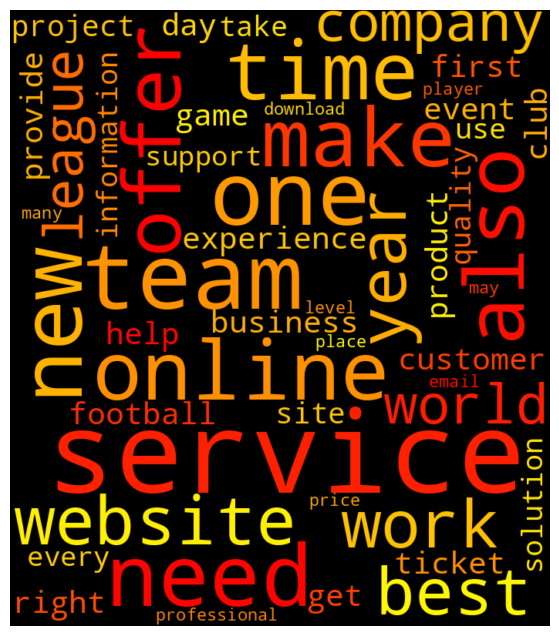

In [ ]:
# WORD CLOUD
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Phishing_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='autumn', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

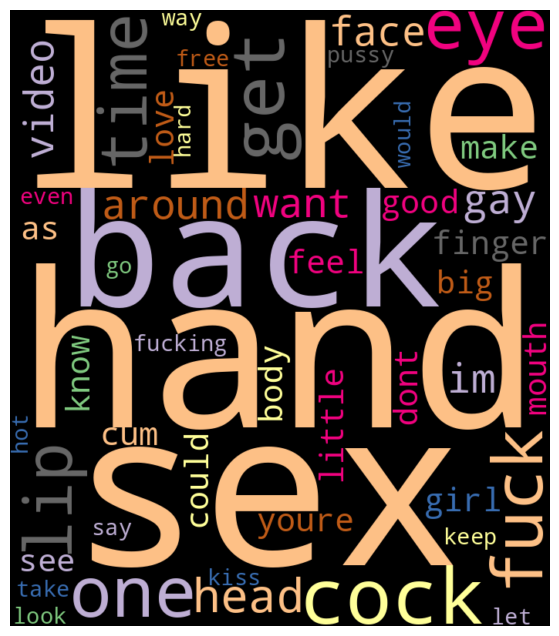

In [ ]:
# WORDCLOUD BIGRAM
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/ADULT_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='Accent', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


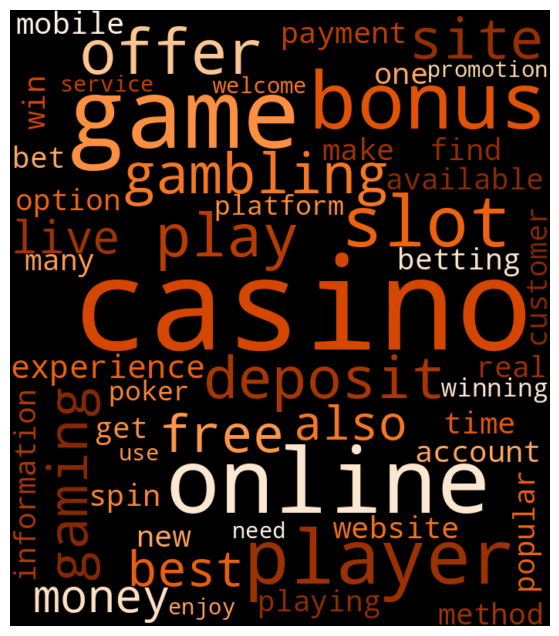

In [ ]:
# WORD CLOUD
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Gambling_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='Oranges', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

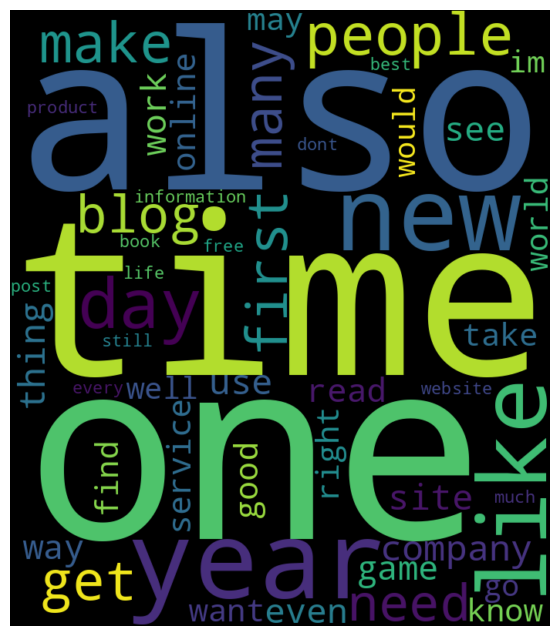

In [ ]:
# WORD CLOUD
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Whitelist_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='viridis', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

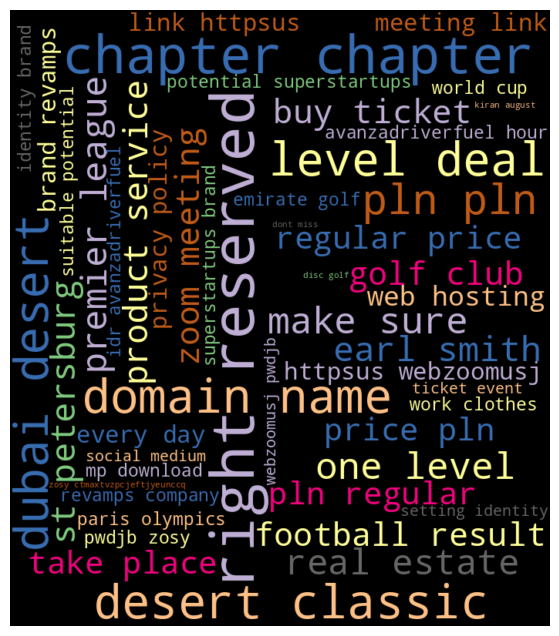

In [ ]:
# WORDCLOUD BIGRAM
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Phishing_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='Accent', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


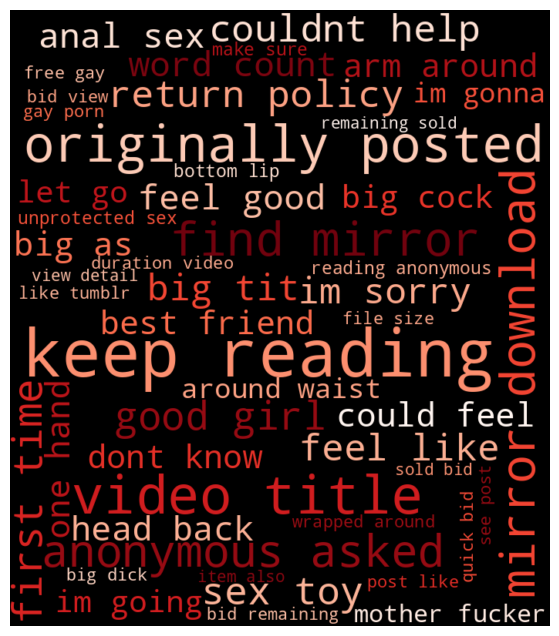

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/ADULT_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='Reds', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


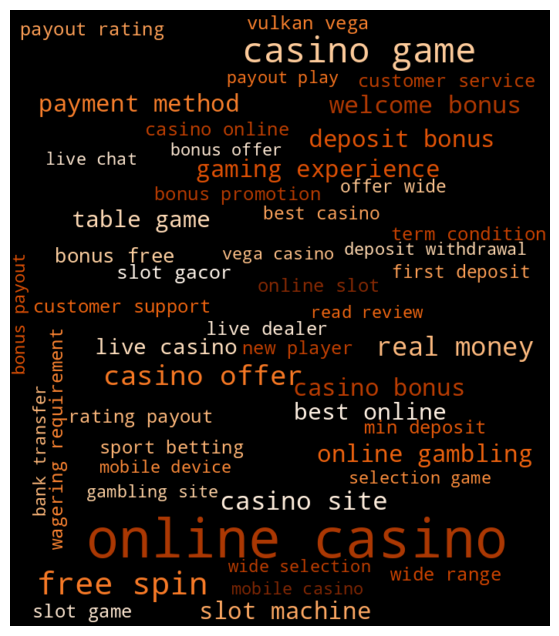

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Gambling_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='Oranges', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


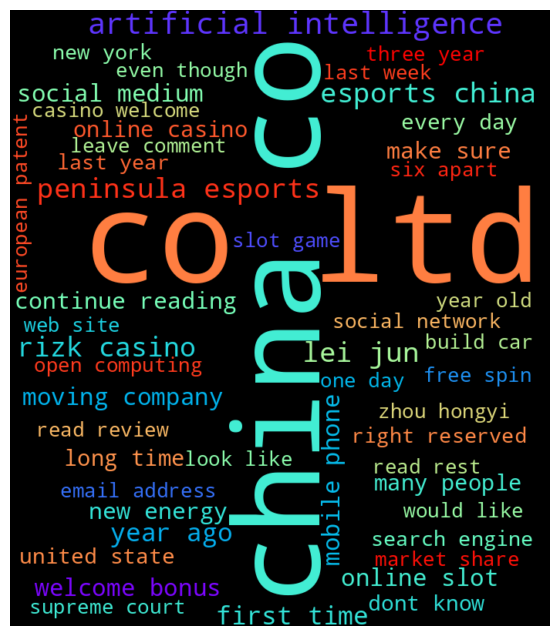

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the data from the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Whitelist_PP.csv'
data = pd.read_csv(file_path, lineterminator='\n')

# Fill NaN values with empty spaces (if any)
data['contents'] = data['contents'].fillna(' ')

# Combine all text content into a single string
all_text = ' '.join(data['contents'].tolist())

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Set ngram_range to (2, 2) for bigrams
X = vectorizer.fit_transform([all_text])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = X.toarray().sum(axis=0)

# Create a dictionary of bigrams and their frequencies
bigram_freq_dict = dict(zip(bigrams, bigram_freq))

# Generate WordCloud with the bigrams
wordcloud = WordCloud(width=700, height=800, background_color='black', colormap='rainbow_r', max_words=50).generate_from_frequencies(bigram_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/ADULT_PP.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # ngram_range=(1, 2) means unigrams and bigrams

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary, feature numbers, and TF-IDF scores
vocabulary = vectorizer.get_feature_names_out()
feature_numbers = list(range(len(vocabulary)))
tfidf_scores = X_tfidf.sum(axis=0).A1  # Sum the scores over all documents

# Create a DataFrame for the result
result_df = pd.DataFrame({
    'TF IDF Vocabulary': vocabulary,
    'Feature no-': feature_numbers,
    'TF IDF Score': tfidf_scores
})

# Split unigrams and bigrams
unigrams_df = result_df[result_df['TF IDF Vocabulary'].apply(lambda x: len(x.split()) == 1)]
bigrams_df = result_df[result_df['TF IDF Vocabulary'].apply(lambda x: len(x.split()) == 2)]

# Sort both DataFrames by TF-IDF Score
unigrams_df = unigrams_df.sort_values(by='TF IDF Score', ascending=False)
bigrams_df = bigrams_df.sort_values(by='TF IDF Score', ascending=False)

# Display the top 50 unigrams and bigrams by TF-IDF score
top_50_unigrams = unigrams_df.head(50)
top_50_bigrams = bigrams_df.head(50)

print("Top 50 Unigrams:")
print(top_50_unigrams[['TF IDF Vocabulary', 'TF IDF Score']])

print("\nTop 50 Bigrams:")
print(top_50_bigrams[['TF IDF Vocabulary', 'TF IDF Score']])

Top 50 Unigrams:
       TF IDF Vocabulary  TF IDF Score
227853             video     18.318567
183077               sex     13.896072
188722           similar     13.513247
120208              like     10.949987
36715               cock     10.729259
81996                get     10.285215
165643             pussy     10.095329
91479               hand      9.799356
77497               fuck      9.164529
83468               girl      9.128439
159561              porn      8.867128
14014               back      8.799865
100465               hot      8.785673
19961                big      8.652346
5908                anal      8.498369
44699                cum      7.975059
242741             youre      7.753261
9999                  as      7.748319
147448               one      7.459488
103665             image      6.838840
103284                im      6.822371
230476              want      6.709581
125782              love      6.676174
64876                eye      6.663319
215906  

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Gambling_PP.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # ngram_range=(1, 2) means unigrams and bigrams

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary, feature numbers, and TF-IDF scores
vocabulary = vectorizer.get_feature_names_out()
feature_numbers = list(range(len(vocabulary)))
tfidf_scores = X_tfidf.sum(axis=0).A1  # Sum the scores over all documents

# Create a DataFrame for the result
result_df = pd.DataFrame({
    'TF IDF Vocabulary': vocabulary,
    'Feature no-': feature_numbers,
    'TF IDF Score': tfidf_scores
})

# Split unigrams and bigrams
unigrams_df = result_df[result_df['TF IDF Vocabulary'].apply(lambda x: len(x.split()) == 1)]
bigrams_df = result_df[result_df['TF IDF Vocabulary'].apply(lambda x: len(x.split()) == 2)]

# Sort both DataFrames by TF-IDF Score
unigrams_df = unigrams_df.sort_values(by='TF IDF Score', ascending=False)
bigrams_df = bigrams_df.sort_values(by='TF IDF Score', ascending=False)

# Display the top 50 unigrams and bigrams by TF-IDF score
top_50_unigrams = unigrams_df.head(50)
top_50_bigrams = bigrams_df.head(50)

print("Top 50 Unigrams:")
print(top_50_unigrams[['TF IDF Vocabulary', 'TF IDF Score']])

print("\nTop 50 Bigrams:")
print(top_50_bigrams[['TF IDF Vocabulary', 'TF IDF Score']])


Top 50 Unigrams:
       TF IDF Vocabulary  TF IDF Score
35290             casino     99.840719
95778               game     54.283827
159667            online     46.238456
28073              bonus     36.946997
173543            player     36.483519
217250              slot     27.757484
156507             offer     24.638382
215151              site     21.616618
98598             gaming     20.395726
94850           gambling     20.197537
61123            deposit     18.939562
172260              play     18.502483
91386               free     16.673080
22980               best     15.673055
81155         experience     14.107214
147566             money     14.061090
132962              live     13.697875
24843            betting     13.374756
8269                also     13.191628
23598                bet     12.336408
256185           website     12.211006
167245           payment     12.102899
259317               win     11.946813
264175              xbet     11.662385
1610    

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Phishing_PP.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # ngram_range=(1, 2) means unigrams and bigrams

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary, feature numbers, and TF-IDF scores
vocabulary = vectorizer.get_feature_names_out()
feature_numbers = list(range(len(vocabulary)))
tfidf_scores = X_tfidf.sum(axis=0).A1  # Sum the scores over all documents

# Create a DataFrame for the result
result_df = pd.DataFrame({
    'TF IDF Vocabulary': vocabulary,
    'Feature no-': feature_numbers,
    'TF IDF Score': tfidf_scores
})

# Split unigrams and bigrams
unigrams_df = result_df[result_df['TF IDF Vocabulary'].apply(lambda x: len(x.split()) == 1)]
bigrams_df = result_df[result_df['TF IDF Vocabulary'].apply(lambda x: len(x.split()) == 2)]

# Sort both DataFrames by TF-IDF Score
unigrams_df = unigrams_df.sort_values(by='TF IDF Score', ascending=False)
bigrams_df = bigrams_df.sort_values(by='TF IDF Score', ascending=False)

# Display the top 50 unigrams and bigrams by TF-IDF score
top_50_unigrams = unigrams_df.head(50)
top_50_bigrams = bigrams_df.head(50)

print("Top 50 Unigrams:")
print(top_50_unigrams[['TF IDF Vocabulary', 'TF IDF Score']])

print("\nTop 50 Bigrams:")
print(top_50_bigrams[['TF IDF Vocabulary', 'TF IDF Score']])


Top 50 Unigrams:
      TF IDF Vocabulary  TF IDF Score
77293           service      8.967093
85813              team      6.139330
24566            domain      6.129452
94735           website      5.784128
67147           product      5.743114
67715           project      5.302619
79446              site      5.187936
26641             email      5.165102
57250               new      5.121236
87698            ticket      4.951063
56310              name      4.856715
80611          solution      4.568237
59765            online      4.474415
56748              need      4.411798
59485               one      4.240493
33209          football      4.236936
58778             offer      4.223443
16617           company      4.216518
96637              work      4.187835
29618        experience      4.104939
20778          customer      4.096764
15324              club      4.093901
73440             right      4.051285
28585             event      3.938257
87902              time      3.90

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load datasets
file_paths = {
    "Porn": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/ADULT_PP.csv",
    "Gambling": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Gambling_PP.csv",
    "Phishing": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Phishing_PP.csv",
    "Whitelist": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Whitelist_PP.csv"
}

# Dictionary to hold top unigrams and bigrams for each category
top_features_by_category = {}

for category, file_path in file_paths.items():
    df = pd.read_csv(file_path)

    # Combine text from the 'contents' column
    text_data = df['contents'].astype(str)

    # Initialize TfidfVectorizer with both unigram and bigram
    vectorizer = TfidfVectorizer(ngram_range=(1, 2))

    # Transform the text data into TF-IDF features
    try:
        X_tfidf = vectorizer.fit_transform(text_data)
    except ValueError as e:
        print(f"Warning: Skipping category '{category}' due to empty vocabulary. (Original error: {e})")
        continue

    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

    # Get the vocabulary and scores
    vocabulary = vectorizer.get_feature_names_out()
    tfidf_scores = X_tfidf.mean(axis=0).A1

    # Create a DataFrame for the result
    result_df = pd.DataFrame({'Feature': vocabulary, 'TF-IDF Score': tfidf_scores})

    # Split unigrams and bigrams
    unigrams_df = result_df[result_df['Feature'].apply(lambda x: len(x.split()) == 1)]
    bigrams_df = result_df[result_df['Feature'].apply(lambda x: len(x.split()) == 2)]

    # Sort by TF-IDF Score
    unigrams_df = unigrams_df.sort_values(by='TF-IDF Score', ascending=False).reset_index(drop=True)
    bigrams_df = bigrams_df.sort_values(by='TF-IDF Score', ascending=False).reset_index(drop=True)

    # Select top 3 unigrams and bigrams (without scores)
    top_unigrams = unigrams_df.head(3)['Feature'].tolist()
    top_bigrams = bigrams_df.head(3)['Feature'].tolist()

    # Store results
    top_features_by_category[category] = {
        'Top Unigrams': top_unigrams,
        'Top Bigrams': top_bigrams
    }

# Display results
for category, features in top_features_by_category.items():
    print(f"Category: {category}")
    print("Top 3 Unigrams:")
    for unigram in features['Top Unigrams']:
        print(f"- {unigram}")
    print("Top 3 Bigrams:")
    for bigram in features['Top Bigrams']:
        print(f"- {bigram}")
    print("\n")

Category: Porn
Top 3 Unigrams:
- nan
- video
- sex
Top 3 Bigrams:
- similar video
- send reply
- log send


Category: Gambling
Top 3 Unigrams:
- casino
- game
- online
Top 3 Bigrams:
- online casino
- casino game
- vulkan vega


Category: Phishing
Top 3 Unigrams:
- service
- team
- domain
Top 3 Bigrams:
- domain name
- right reserved
- email address


Category: Whitelist
Top 3 Unigrams:
- blog
- time
- one
Top 3 Bigrams:
- right reserved
- continue reading
- social medium




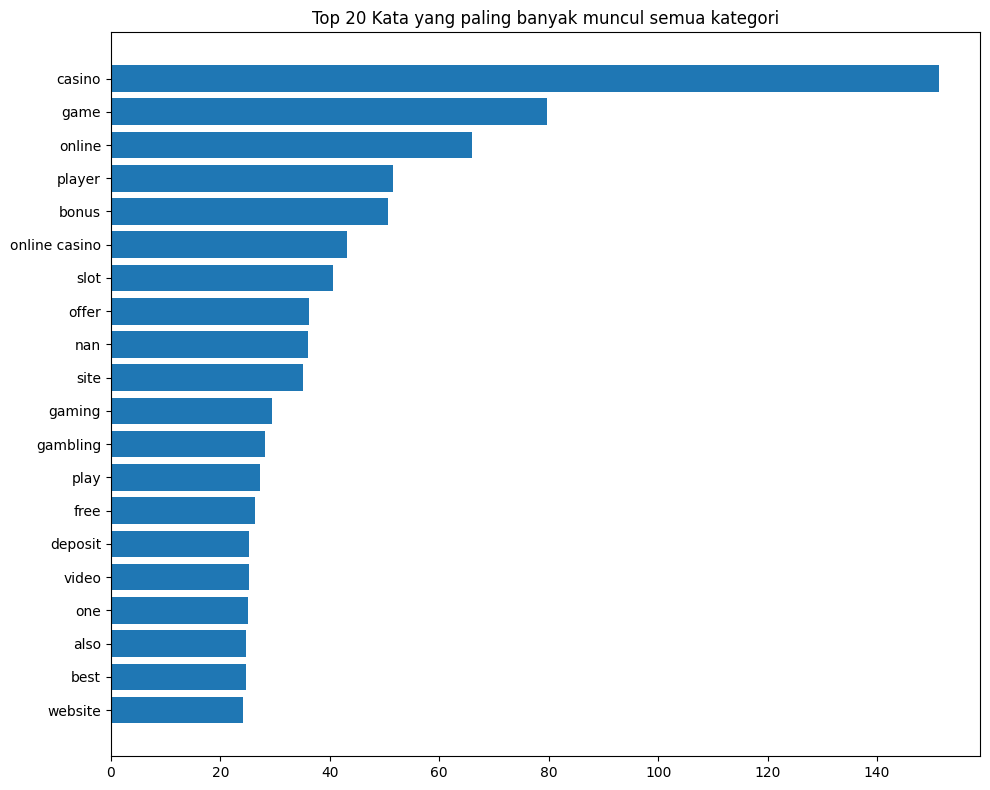

In [ ]:
# prompt: buatkan plot bar secara horizontal. Gabung unigram dan bigram ,untuk file Dataset_Labelsv2.csv, datanya cukup besar. ambil 20 kata. Tampilkan frekuensi tfidf dalam bentuk angka (misal 0 - 500)

import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/Dataset_Labelsv2.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary and scores
vocabulary = vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1

# Create a DataFrame for the result
result_df = pd.DataFrame({'Feature': vocabulary, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF Score in descending order
result_df = result_df.sort_values(by='TF-IDF Score', ascending=False)

# Select top 20 features
top_20_features = result_df.head(20)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['TF-IDF Score'])
plt.title('Top 20 Kata yang paling banyak muncul semua kategori')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.tight_layout()
plt.show()


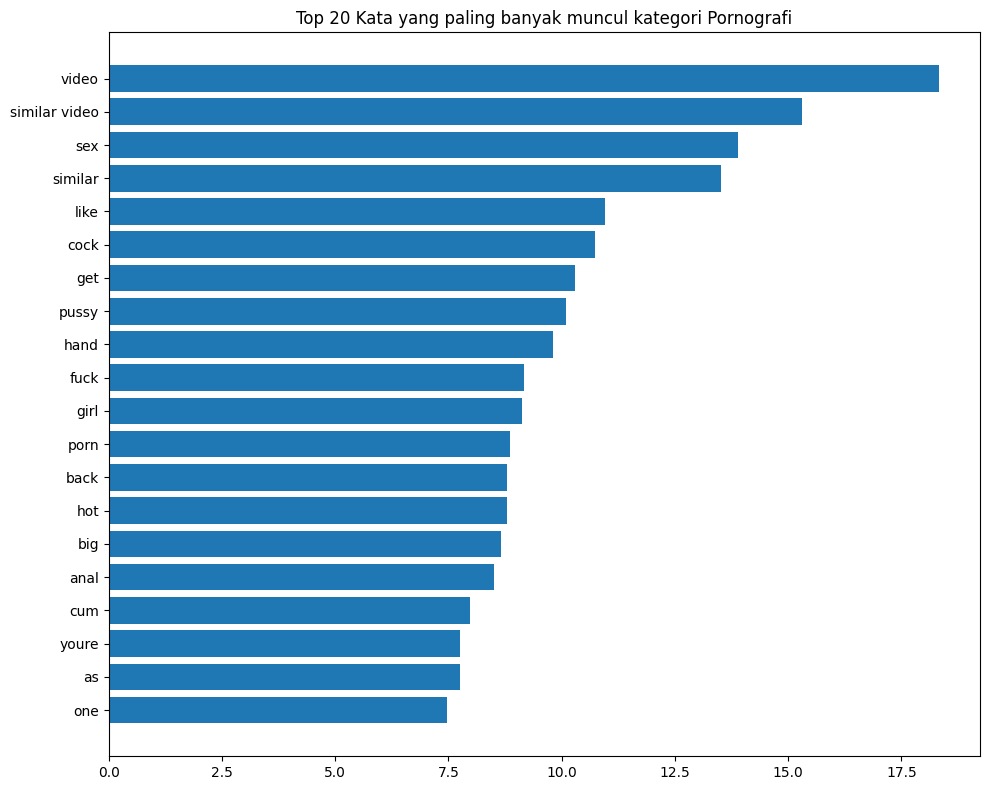

In [ ]:
# prompt: buatkan plot bar secara horizontal. Gabung unigram dan bigram ,untuk file Dataset_Labelsv2.csv, datanya cukup besar. ambil 20 kata. Tampilkan frekuensi tfidf dalam bentuk angka (misal 0 - 500)

import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/ADULT_PP.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary and scores
vocabulary = vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1

# Create a DataFrame for the result
result_df = pd.DataFrame({'Feature': vocabulary, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF Score in descending order
result_df = result_df.sort_values(by='TF-IDF Score', ascending=False)

# Select top 20 features
top_20_features = result_df.head(20)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['TF-IDF Score'])
plt.title('Top 20 Kata yang paling banyak muncul kategori Pornografi')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.tight_layout()
plt.show()


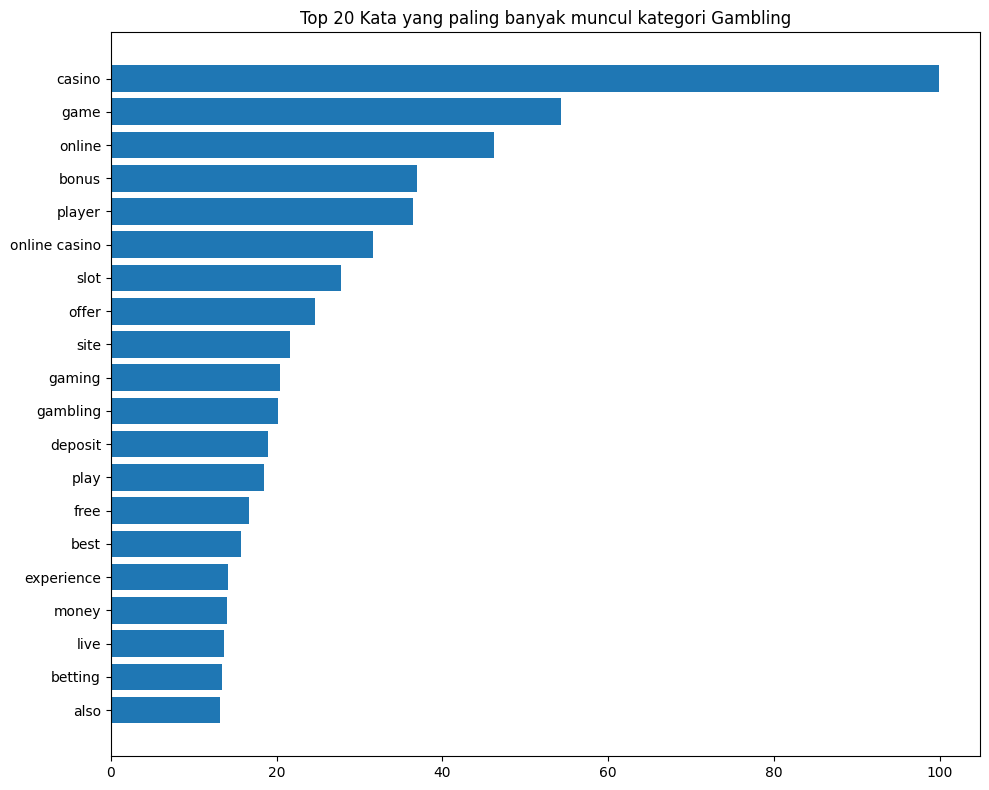

In [ ]:
# prompt: buatkan plot bar secara horizontal. Gabung unigram dan bigram ,untuk file Dataset_Labelsv2.csv, datanya cukup besar. ambil 20 kata. Tampilkan frekuensi tfidf dalam bentuk angka (misal 0 - 500)

import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Gambling_PP.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary and scores
vocabulary = vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1

# Create a DataFrame for the result
result_df = pd.DataFrame({'Feature': vocabulary, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF Score in descending order
result_df = result_df.sort_values(by='TF-IDF Score', ascending=False)

# Select top 20 features
top_20_features = result_df.head(20)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['TF-IDF Score'])
plt.title('Top 20 Kata yang paling banyak muncul kategori Gambling')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.tight_layout()
plt.show()


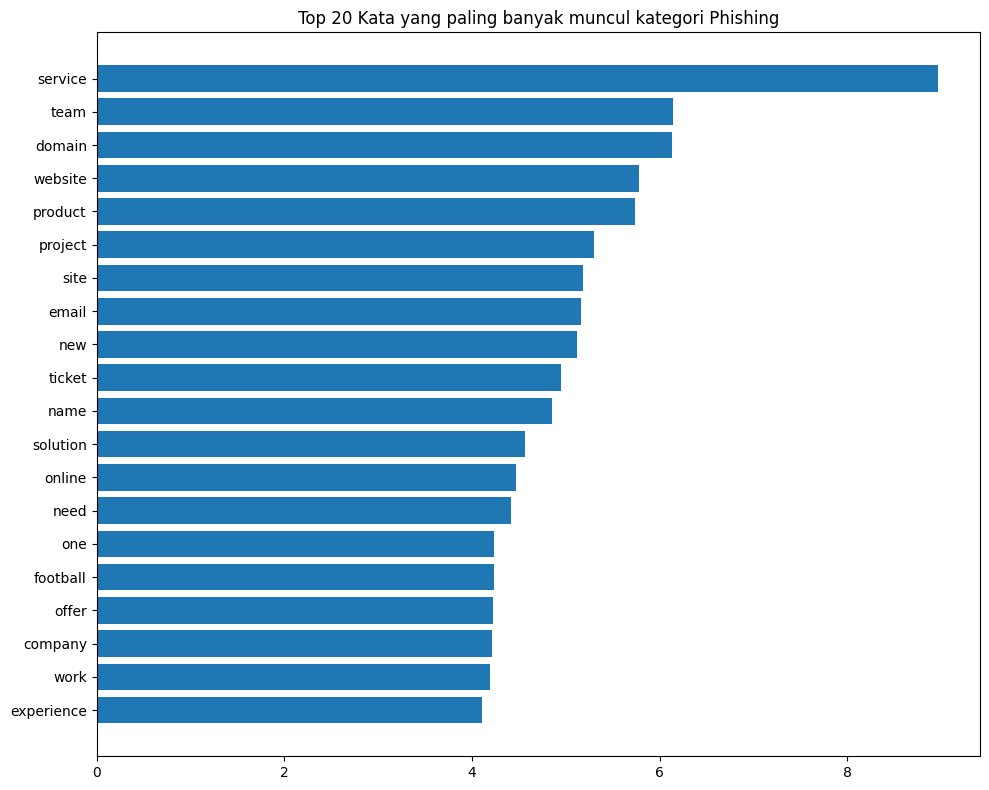

In [ ]:
# prompt: buatkan plot bar secara horizontal. Gabung unigram dan bigram ,untuk file Dataset_Labelsv2.csv, datanya cukup besar. ambil 20 kata. Tampilkan frekuensi tfidf dalam bentuk angka (misal 0 - 500)

import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Phishing_PP.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary and scores
vocabulary = vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1

# Create a DataFrame for the result
result_df = pd.DataFrame({'Feature': vocabulary, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF Score in descending order
result_df = result_df.sort_values(by='TF-IDF Score', ascending=False)

# Select top 20 features
top_20_features = result_df.head(20)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['TF-IDF Score'])
plt.title('Top 20 Kata yang paling banyak muncul kategori Phishing')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.tight_layout()
plt.show()


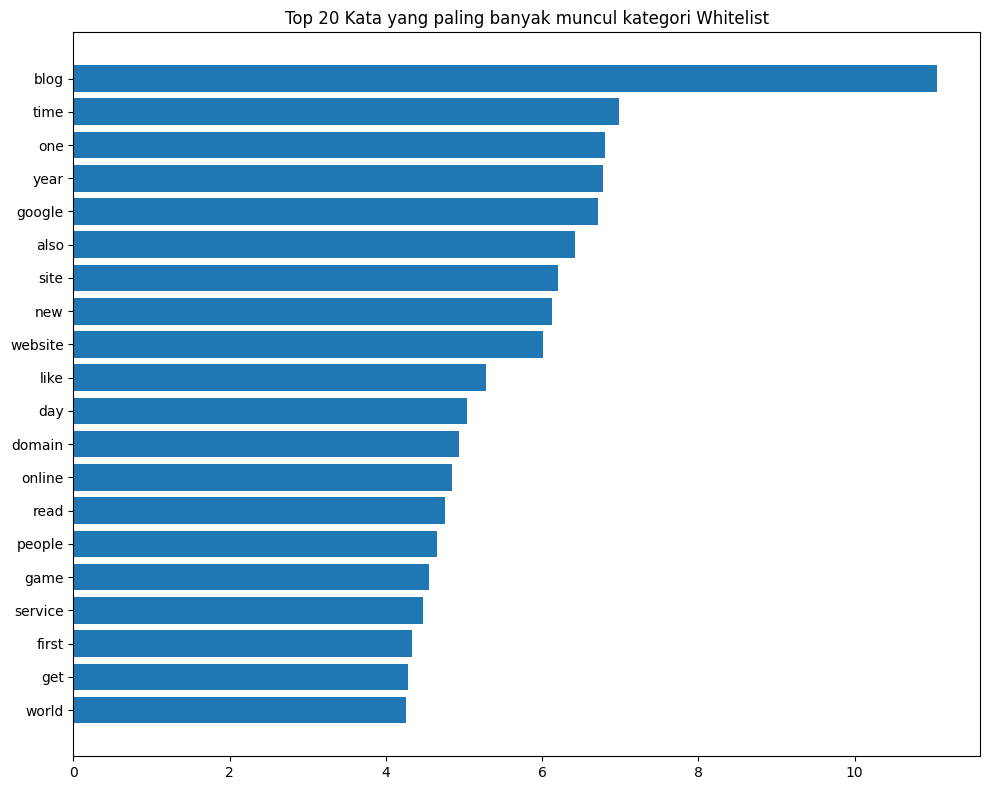

In [ ]:
# prompt: buatkan plot bar secara horizontal. Gabung unigram dan bigram ,untuk file Dataset_Labelsv2.csv, datanya cukup besar. ambil 20 kata. Tampilkan frekuensi tfidf dalam bentuk angka (misal 0 - 500)

import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Whitelist_PP.csv"
df = pd.read_csv(file_path)

# Combine text from the 'contents' column
text_data = df['contents'].astype(str)

# Initialize TfidfVectorizer with both unigram and bigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary and scores
vocabulary = vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1

# Create a DataFrame for the result
result_df = pd.DataFrame({'Feature': vocabulary, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF Score in descending order
result_df = result_df.sort_values(by='TF-IDF Score', ascending=False)

# Select top 20 features
top_20_features = result_df.head(20)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['TF-IDF Score'])
plt.title('Top 20 Kata yang paling banyak muncul kategori Whitelist')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.tight_layout()
plt.show()

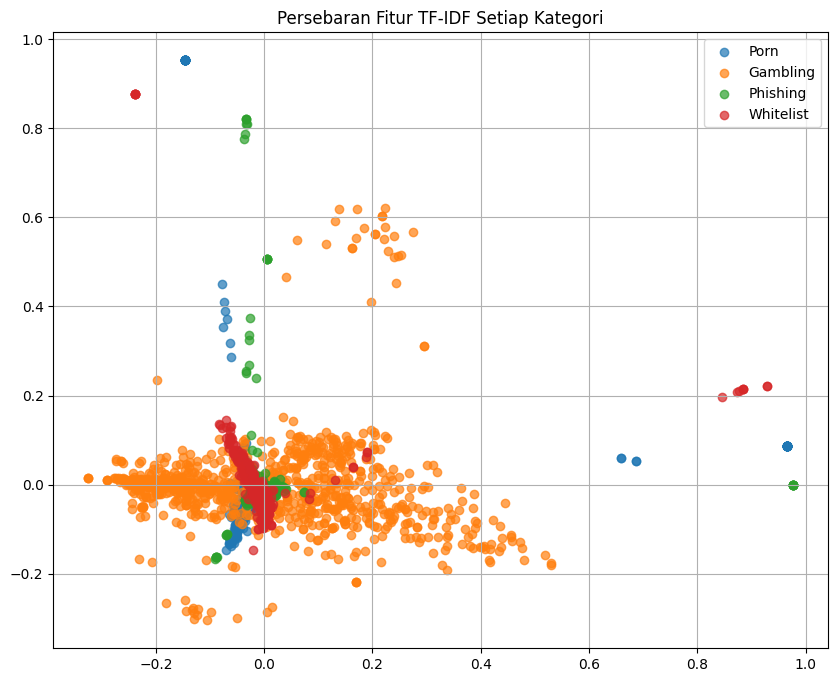

In [ ]:
# prompt: buatkan scatterplot persebaran fitur tfidf setiap kategori dalam 2 dimensi

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load datasets
file_paths = {
    "Porn": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/ADULT_PP.csv",
    "Gambling": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Gambling_PP.csv",
    "Phishing": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Phishing_PP.csv",
    "Whitelist": "/content/drive/MyDrive/Colab Notebooks/Web Scraping Reihan/Klasifikasi/Versi 2/PrePro/Whitelist_PP.csv"
}

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Fit the vectorizer on all data to get the same vocabulary
all_text_data = []
for file_path in file_paths.values():
    df = pd.read_csv(file_path)
    all_text_data.extend(df['contents'].astype(str).tolist())
vectorizer.fit(all_text_data)

# Initialize PCA for dimensionality reduction
pca = PCA(n_components=2)

# Plot scatterplot for each category
plt.figure(figsize=(10, 8))
for category, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    text_data = df['contents'].astype(str)

    # Transform text data to TF-IDF features
    X_tfidf = vectorizer.transform(text_data)

    # Apply PCA to reduce to 2 dimensions
    X_pca = pca.fit_transform(X_tfidf.toarray())

    # Plot the scatterplot
    plt.scatter(X_pca[:, 0], X_pca[:, 1], label=category, alpha=0.7)

plt.title('Persebaran Fitur TF-IDF Setiap Kategori')
plt.legend()
plt.grid(True)
plt.show()
